In [4]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(945, 630, 3)
(945, 630)


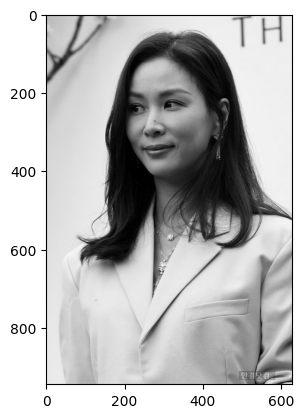

In [5]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/gsy2.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

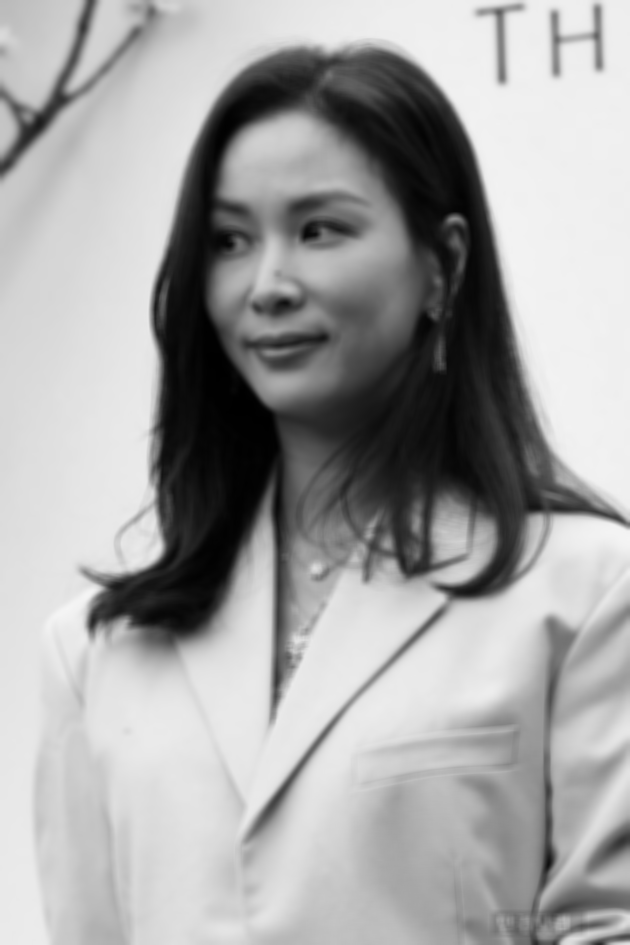

In [8]:
outImg = cv2.blur(gImg, (7, 7))
cv2_imshow(outImg)

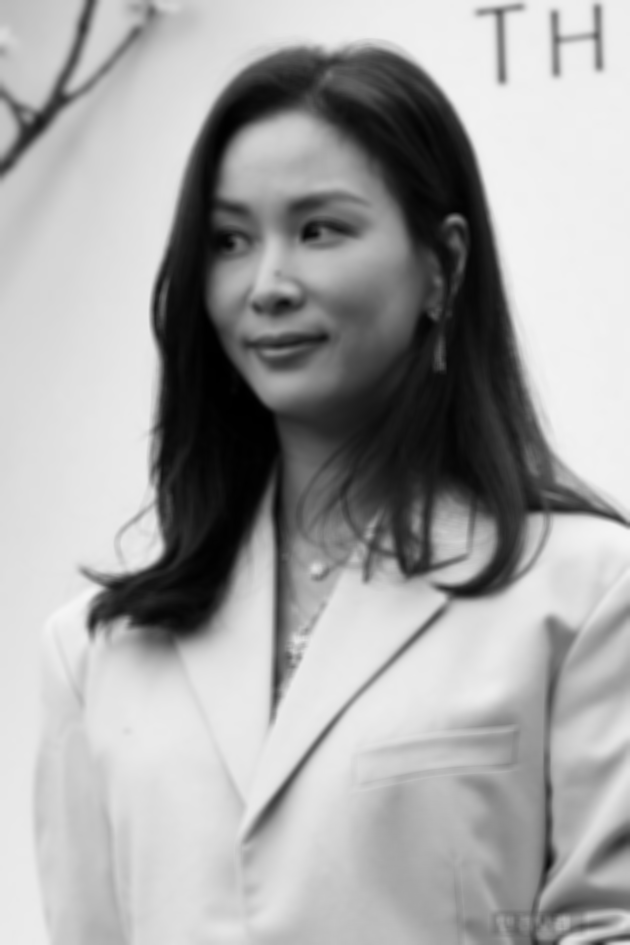

In [12]:
outImg = cv2.GaussianBlur(gImg, (7, 7), 5)
cv2_imshow(outImg)

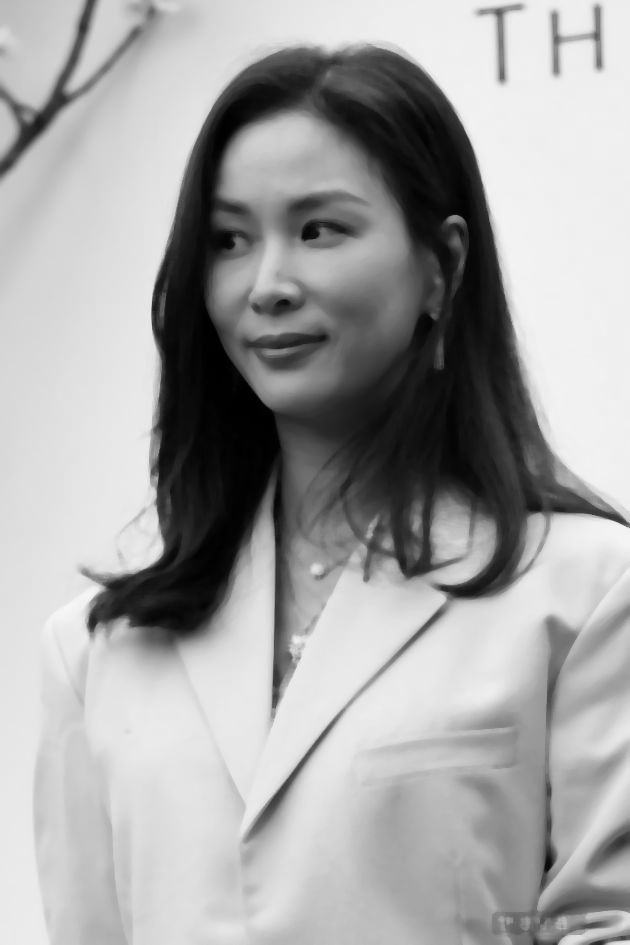

In [15]:
outImg = cv2.medianBlur(gImg, 7)
cv2_imshow(outImg)

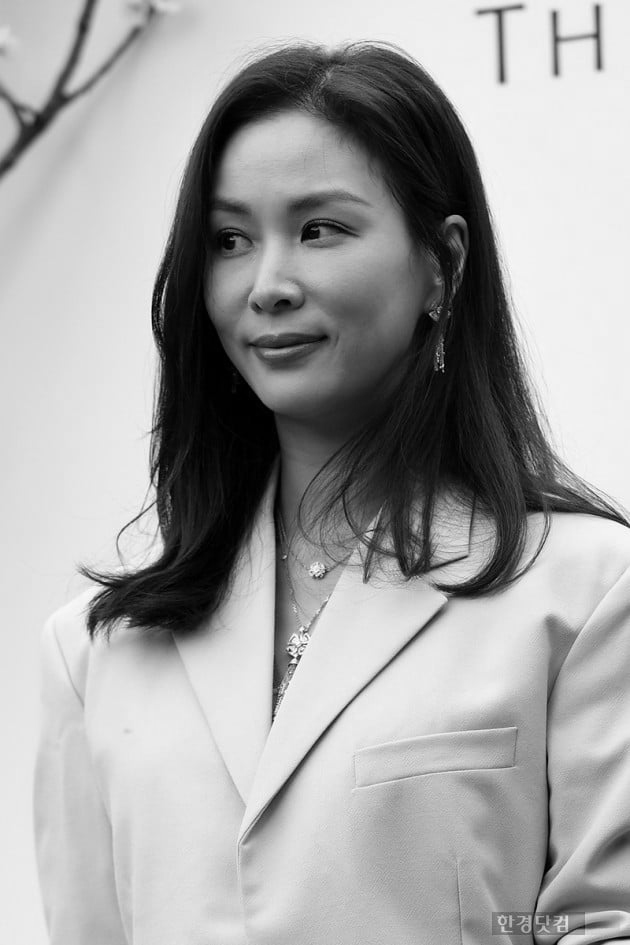

In [27]:
outImage = gImg.copy()
#blurImage = cv2.GaussianBlur(outImage, (7, 7), 5)
blurImage = cv2.medianBlur(outImage, 7)
x = 270
y = 270
size = 15

for h in range(y, y+size):
  for w in range(x, x+size):
    #outImage[h][w] = 255
    outImage[h][w] = blurImage[h][w]

cv2_imshow(outImage)

(256, 256, 3)
(256, 256)


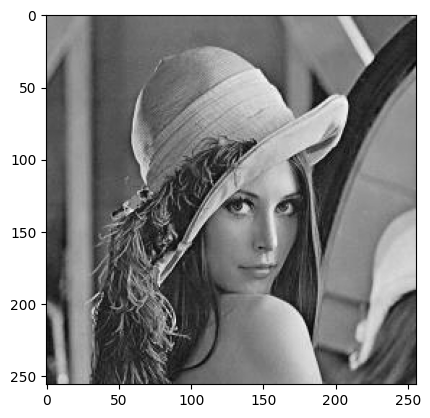

In [28]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/lena256.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

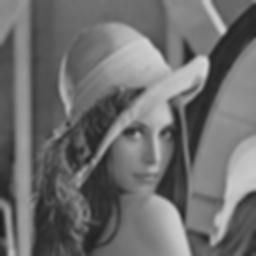

In [32]:
outImg = cv2.GaussianBlur(gImg, (7, 7), 2)
cv2_imshow(outImg)

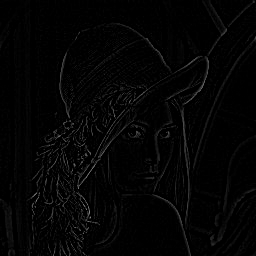

In [33]:
edgeImage = cv2.addWeighted(gImg, 1, outImg, -1, 0)
cv2_imshow(edgeImage)

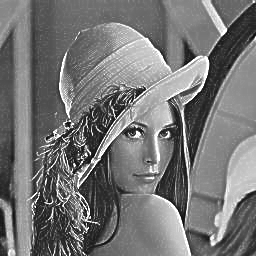

In [41]:
unsharpImage = cv2.addWeighted(gImg, 1, edgeImage, 2, 0)
cv2_imshow(unsharpImage)

In [44]:
kernel3 = np.ones((3,3), np.float32)/9
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 17/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9

엣지계산 + 오리지널 합치기 = 이미지 더욱 뚜렷해짐

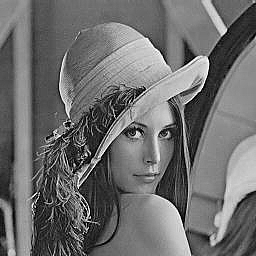

In [45]:
output = cv2.filter2D(gImg, -1, kernel3)
cv2_imshow(output)